In [238]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [239]:
data = pd.read_csv('../data/diamonds_train.csv')

## Checking dataset

In [240]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95


In [241]:
data.shape

(40455, 10)

* **Carat**:  diamond weigth

* **Cut**:  cut quality

* **Color**:  color

* **Clarity**:  diamond clarity and inclusions

* **Depth**:  realationship between z, x and y: z/mean(x+y). Depth refers to the distance between the culet and the table when the diamond is viewed from the side. The lower the depth %, the larger a diamond of a given carat weight will appear .

* **Table**:  top horizontal facet, expressed as the relationship with the average girdle diameter. Excellent quality -> 52-62% 

* **Price**:  

* **X**:  diamond length

* **Y**:  diamond width

* **Z**:  diamond height

In [242]:
data.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [243]:
# Checking for null values
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [244]:
data.describe()

,carat,depth,table,price,x,y,z
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,0.797706,61.752841,57.446133,3928.444469,5.729392,5.732819,3.537154
std,0.475544,1.431725,2.233535,3992.416147,1.124453,1.146650,0.697062
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,945.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2397.000000,5.690000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5331.000000,6.540000,6.540000,4.035000
max,4.500000,79.000000,95.000000,18823.000000,10.230000,58.900000,8.060000


Min value in x,y,z is 0...

In [245]:
# Dropping nosense rows:

x_filter = data['x']==0
y_filter = data['y']==0
z_filter = data['z']==0

data.drop(data[(x_filter | y_filter | z_filter)].index, inplace=True)

In [286]:
# Talking about brilliant cut diamonds, 58.9 as max value for y does not have any sense.
data[data['volume']==data['volume'].max()]
data.drop(14708, inplace=True)

In [287]:
data.describe()

,carat,depth,table,price,x,y,z,volume
count,40438.000000,40438.000000,40438.000000,40438.000000,40438.000000,40438.000000,40438.000000,40438.000000
mean,0.797396,61.753084,57.445554,3926.330605,5.729558,5.731582,3.538441,129.761853
std,0.475226,1.431253,2.233082,3989.861191,1.122337,1.114072,0.693283,76.689374
min,0.200000,43.000000,43.000000,326.000000,3.770000,3.720000,1.070000,32.262375
25%,0.400000,61.000000,56.000000,945.000000,4.710000,4.720000,2.910000,64.943424
50%,0.700000,61.800000,57.000000,2396.000000,5.690000,5.710000,3.520000,114.716880
75%,1.040000,62.500000,59.000000,5328.750000,6.540000,6.540000,4.040000,170.846820
max,4.500000,79.000000,95.000000,18823.000000,10.230000,10.160000,6.720000,698.455296


## Price

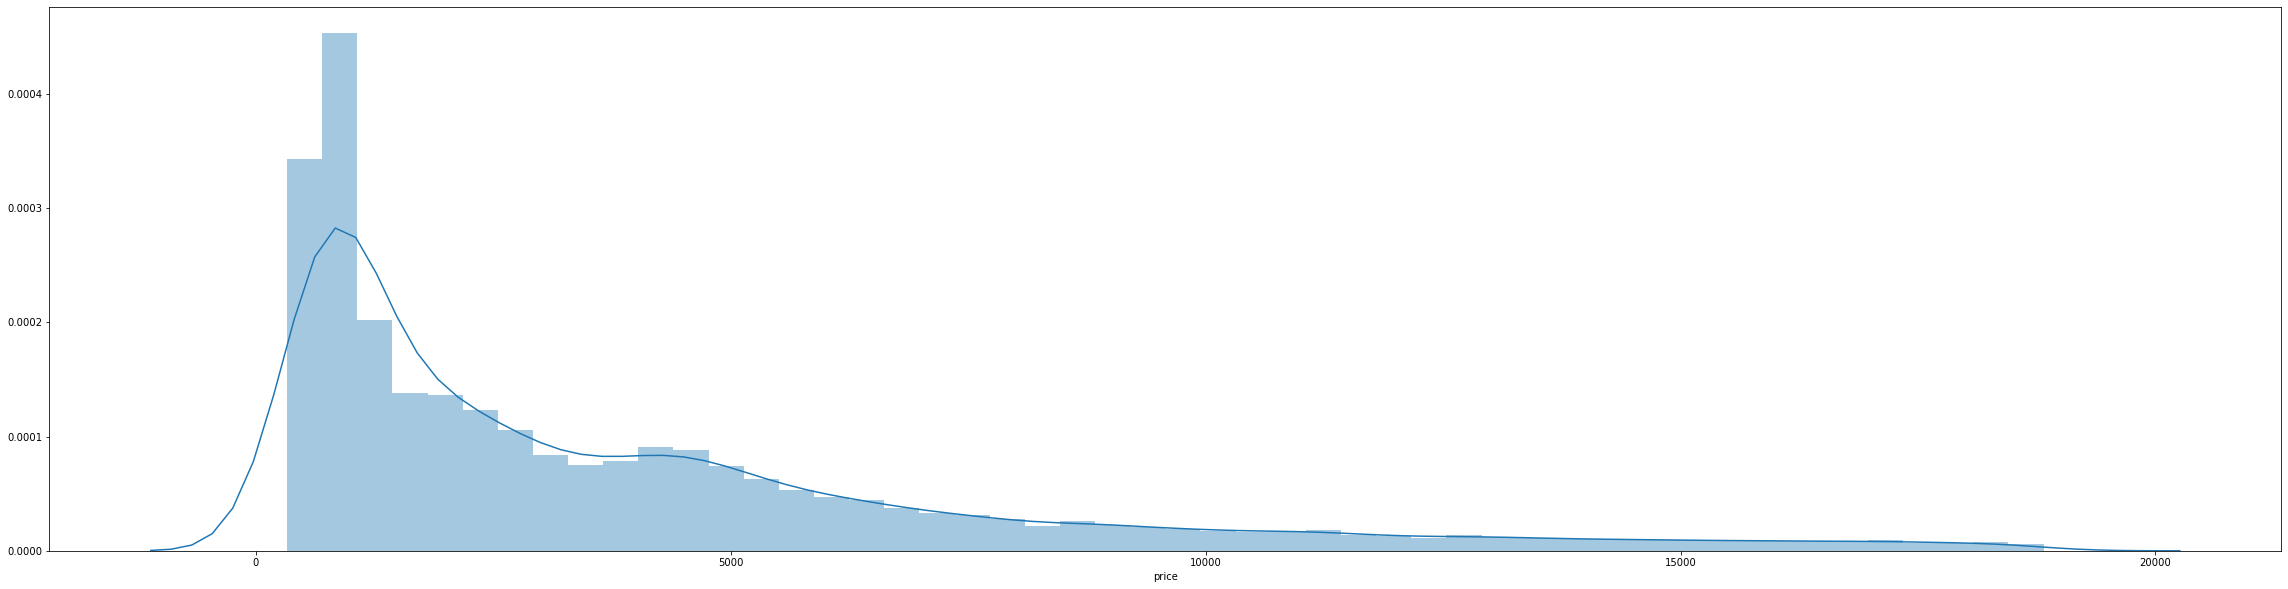

In [250]:
plt.figure(figsize=(40,10))
sns.distplot(data['price']);

## Cut

In [326]:
cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']

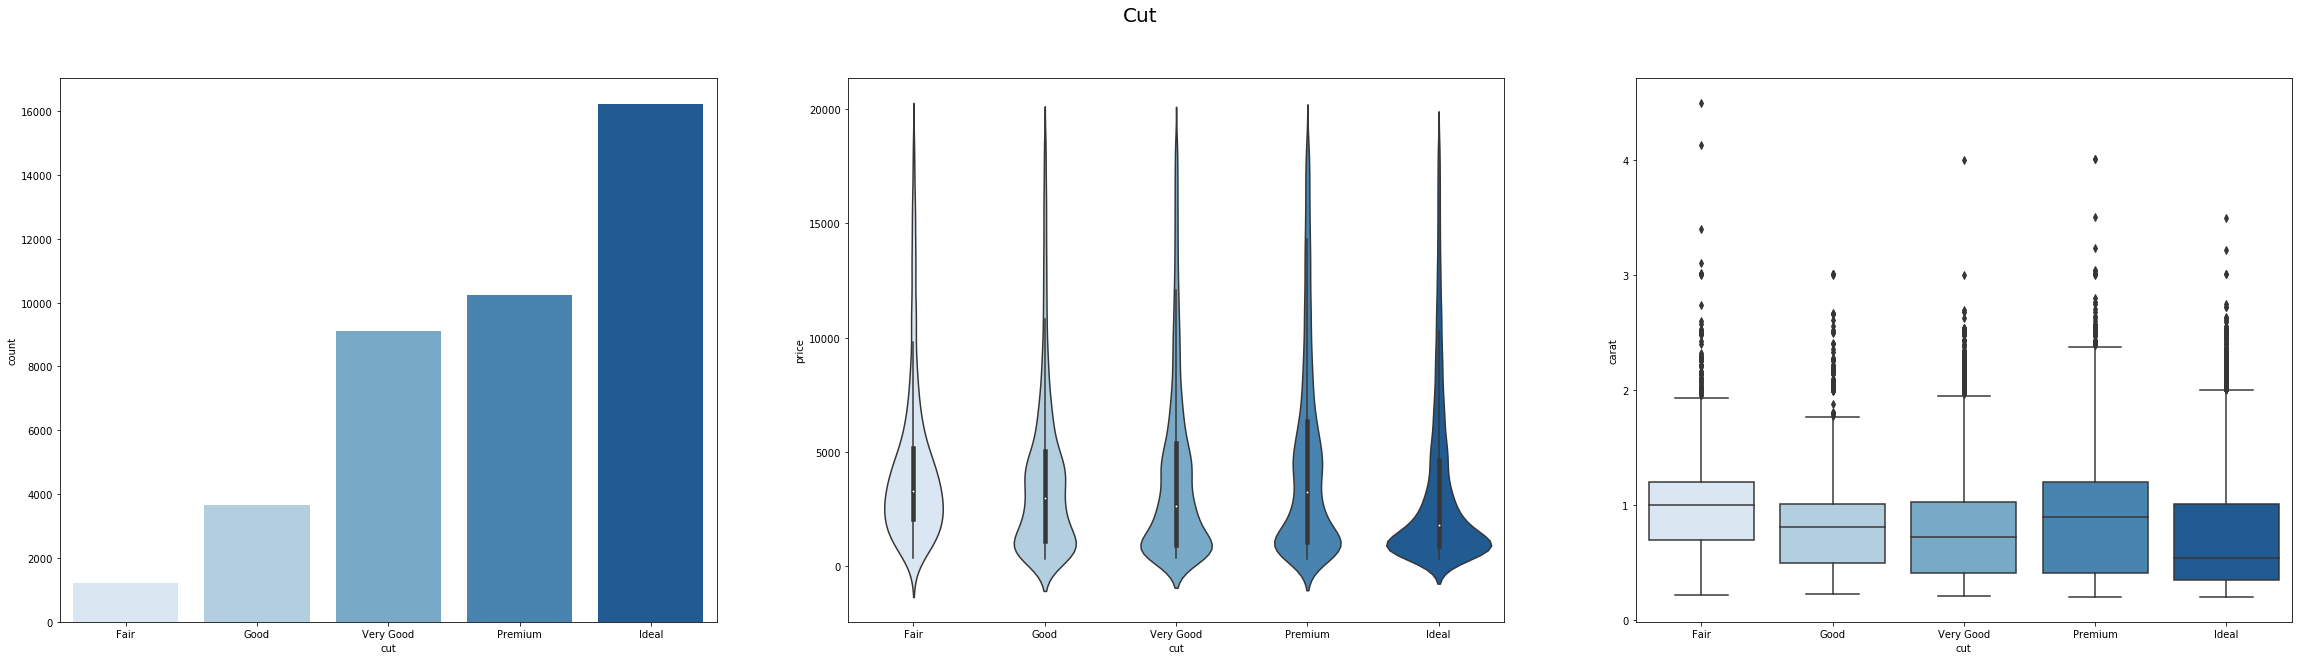

In [356]:
fig, axes = plt.subplots(ncols=3, nrows =1, figsize = (40,10))
fig.suptitle('Cut', fontsize= 20)

sns.countplot(data=data, ax=axes[0], x='cut', palette='Blues', order=cut_order)
sns.violinplot(data=data, ax=axes[1],x='cut', y='price', palette='Blues', order=cut_order)
sns.boxplot(data= data, ax=axes[2], x='cut', y='carat', palette='Blues', order=cut_order);



Understanding Box Plot :

The bottom line indicates the min value of Age.
The upper line indicates the max value.
The middle line of the box is the median or the 50% percentile.
The side lines of the box are the 25 and 75 percentiles respectively.



Although the Carat Weight of a Diamond has the Strongest Effect on Prices, the Cut can still Drastically Increase or Decrease its value.
With a Higher Cut Quality, the Diamond’s Cost per Carat Increases.
This is because there is a Higher Wastage of the Rough Stone as more Material needs to be Removed in order to achieve better Proportions and Symmetr

## Color

In [322]:
color_order = ['J', 'I', 'H', 'G', 'F', 'E', 'D']

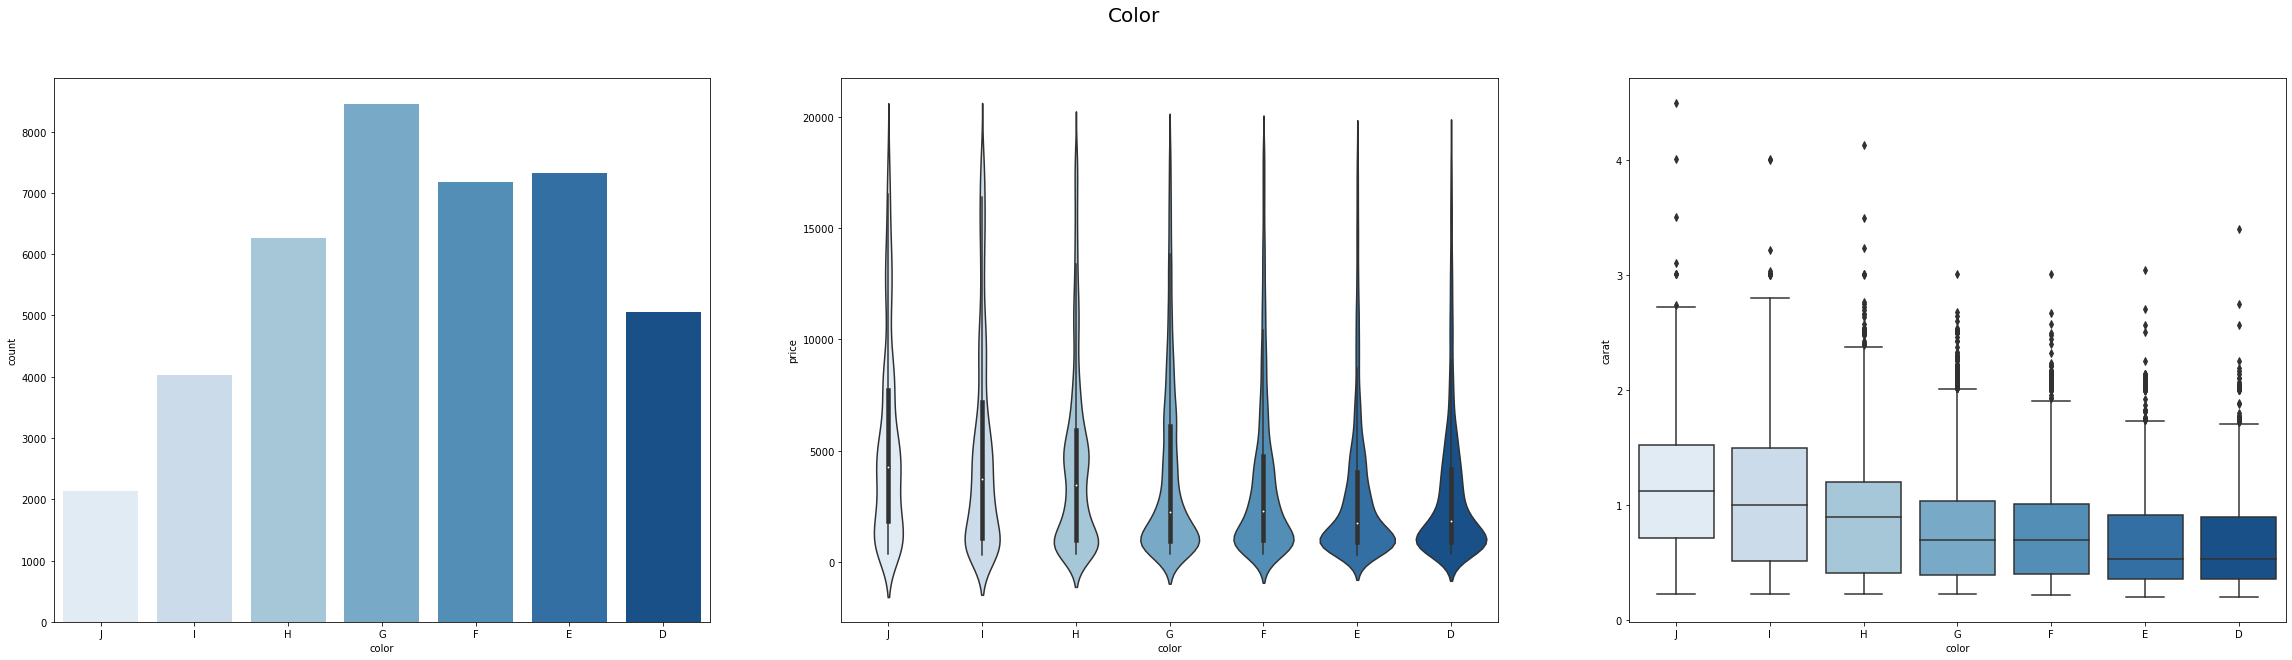

In [357]:
fig, axes = plt.subplots(ncols=3, nrows =1, figsize = (40,10))
fig.suptitle('Color', fontsize= 20)

sns.countplot(data=data, ax=axes[0], x='color', palette='Blues', order=color_order)
sns.violinplot(data=data, ax=axes[1],x='color', y='price', palette='Blues', order=color_order)
sns.boxplot(data= data, ax=axes[2], x='color', y='carat', palette='Blues', order=color_order);


    The Color of a Diamond refers to the Tone and Saturation of Color, or the Depth of Color in a Diamond.
    The Color of a Diamond can Range from Colorless to a Yellow or a Faint Brownish Colored hue.
    Colorless Diamonds are Rarer and more Valuable because they appear Whiter and Brighter.


## Clarity

In [324]:
clarity_order = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

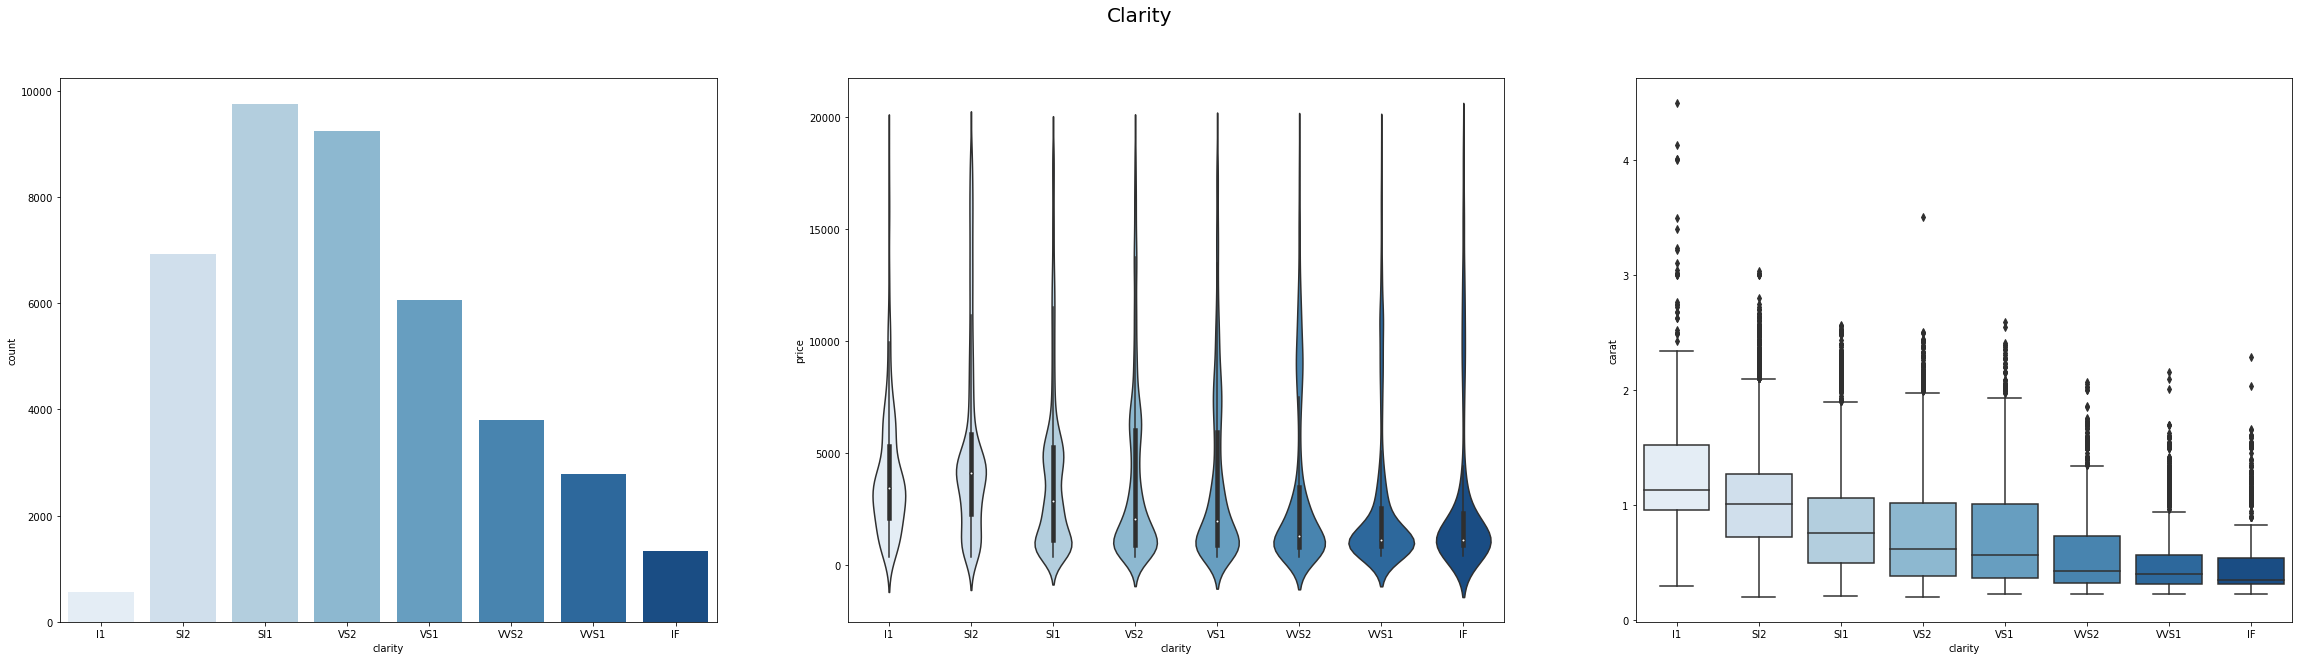

In [355]:
fig, axes = plt.subplots(ncols=3, nrows =1, figsize = (40,10))
fig.suptitle('Clarity', fontsize= 20)

sns.countplot(data=data, ax=axes[0], x='clarity', palette='Blues', order=clarity_order)
sns.violinplot(data=data, ax=axes[1],x='clarity', y='price', palette='Blues', order=clarity_order)
sns.boxplot(data= data, ax=axes[2], x='clarity', y='carat', palette='Blues', order=clarity_order);


    Diamond Clarity refers to the absence of the Inclusions and Blemishes.
    An Inclusion is an Imperfection located within a Diamond. Inclusions can be Cracks or even Small Minerals or Crystals that have formed inside the Diamond.
    Blemishing is a result of utting and polishing process than the environmental conditions in which the diamond was formed. It includes scratches, extra facets etc.


## Carat

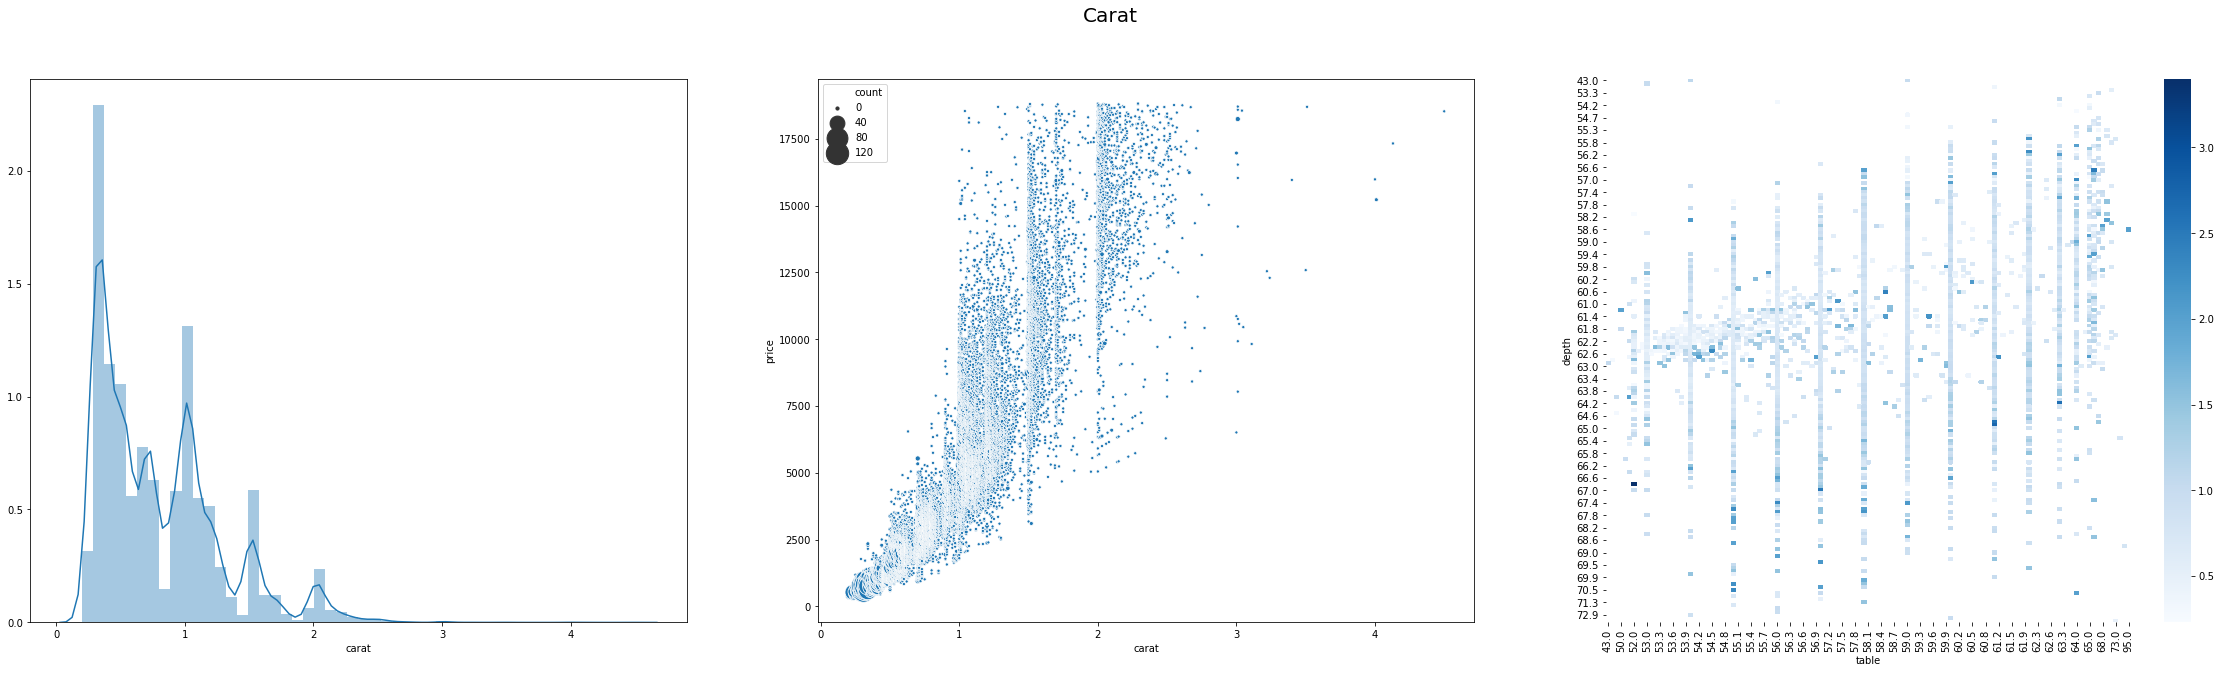

In [257]:
fig, axes = plt.subplots(ncols=3, nrows =1, figsize = (40,10))
fig.suptitle('Carat', fontsize= 20)

sns.distplot(data['carat'], ax=axes[0])


carat_price=data[['carat', 'price', 'cut']].groupby(['carat', 'price']).agg(count=('cut','count')).reset_index()
sns.scatterplot(data=carat_price, ax=axes[1], x='carat', y='price', size='count', palette='Blues',sizes=(10, 500))

carat_depth_table= data[['carat', 'depth', 'table']].pivot_table(index='depth', columns='table', aggfunc='mean')
carat_depth_table.columns = carat_depth_table.columns.droplevel(0)
sns.heatmap(carat_depth_table, ax=axes[2], cmap='Blues');


    Carat refers to the Weight of the Stone, not the Size.
    The Weight of a Diamond has the most significant Impact on its Price.
    Since the larger a Stone is, the Rarer it is, one 2 Carat Diamond will be more Expensive than the Total cost of two 1 Carat Diamonds of the Same Quality.
    The carat of a Diamond is often very Important to People when shopping But it is a Mistake to Sacrifice too much quality for sheer size.


## Color/Cut/Clarity vs Avg. Price

In [258]:
cut_color = data[['color', 'cut', 'price']].pivot_table(index='color', columns='cut', aggfunc='mean')
cut_color.columns = cut_color.columns.droplevel(0)
cut_color = cut_color[['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']]

In [259]:
cut_clarity = data[['clarity', 'cut', 'price']].pivot_table(index='clarity', columns='cut', aggfunc='mean')
cut_clarity.columns = cut_clarity.columns.droplevel(0)
cut_clarity.reindex(['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1'])
cut_clarity = cut_clarity[['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']]

In [260]:
color_clarity = data[['clarity', 'color', 'price']].pivot_table(index='color', columns='clarity', aggfunc='mean')
color_clarity.columns = color_clarity.columns.droplevel(0)
color_clarity = color_clarity[['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']]

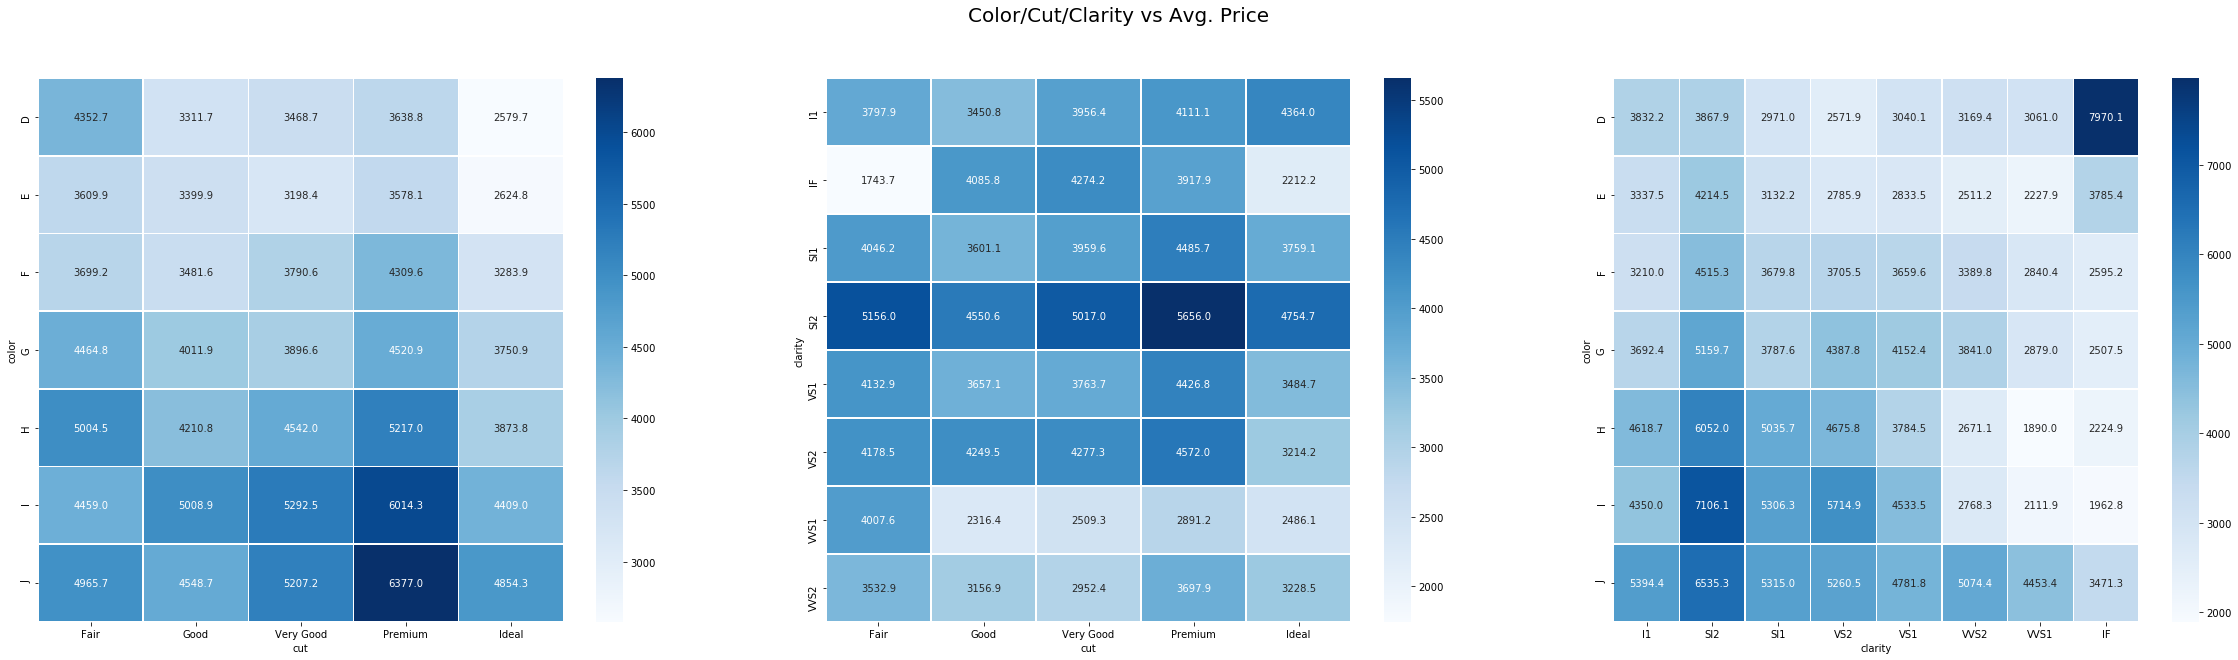

In [261]:
fig, axes = plt.subplots(ncols=3, nrows =1, figsize = (40,10))
fig.suptitle('Color/Cut/Clarity vs Avg. Price', fontsize= 20)

sns.heatmap(cut_color, annot=True, fmt='.1f', ax=axes[0], cmap='Blues',linewidths=.5)
sns.heatmap(cut_clarity, annot=True, fmt='.1f', ax=axes[1], cmap='Blues',linewidths=.5)
sns.heatmap(color_clarity, annot=True, fmt='.1f', ax=axes[2], cmap='Blues',linewidths=.5);

# Dimensions (x,y,z)

In [295]:
data['volume'] = data['x']*data['y']*data['z']

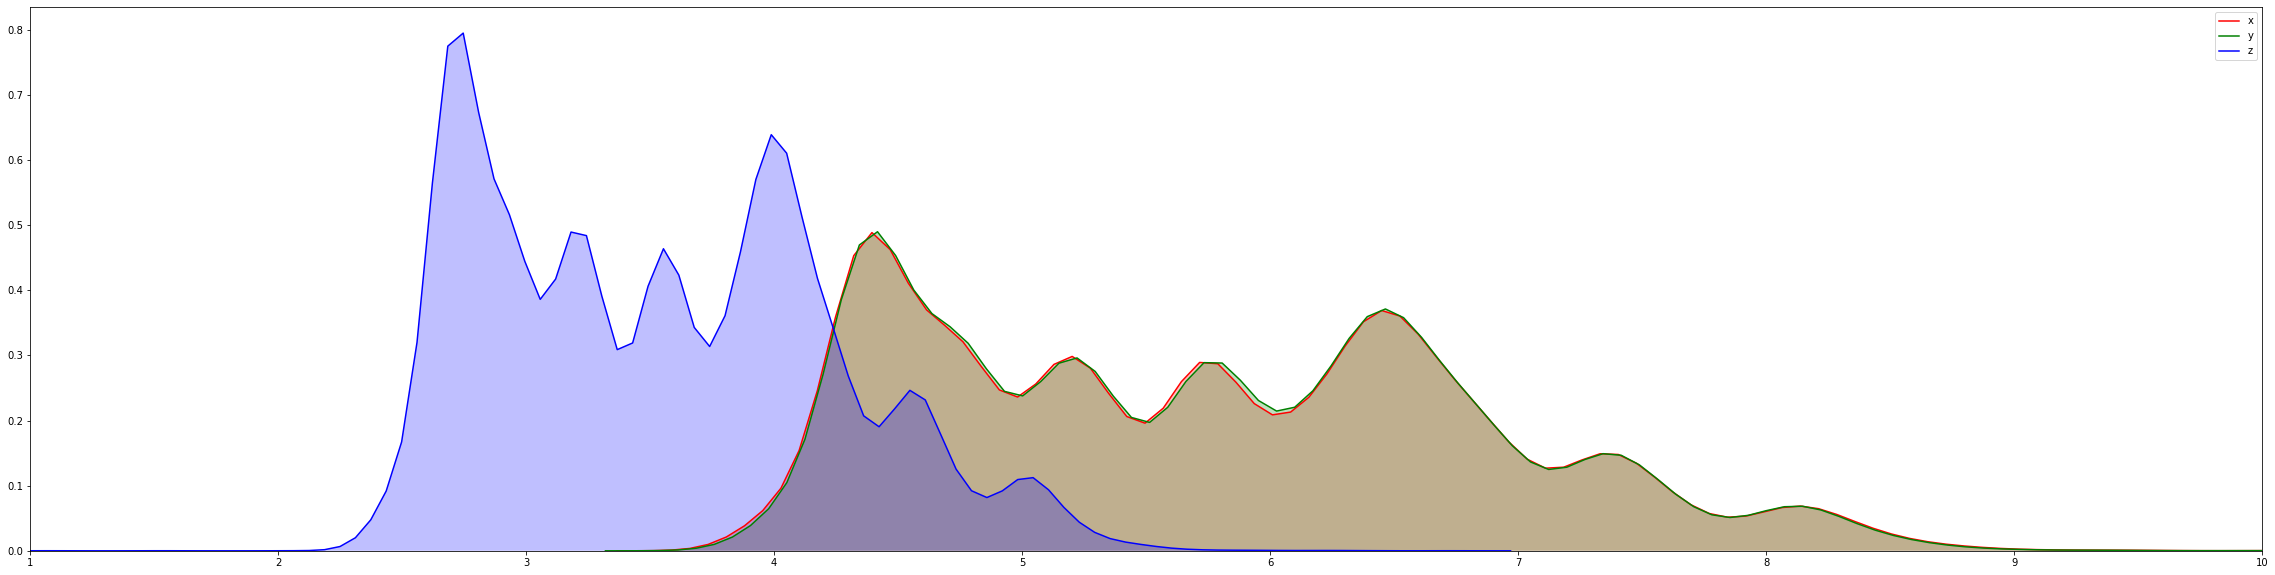

In [360]:
plt.subplots(figsize = (40,10))
plt.xlim(1,10)
sns.kdeplot(data['x'] , shade=True , color='r' )
sns.kdeplot(data['y'] , shade=True , color='g' )
sns.kdeplot(data['z'] , shade= True , color='b');

# after dropping y outlier, x and y are almost identical, which have sense because of the round form of the brilliant cut.

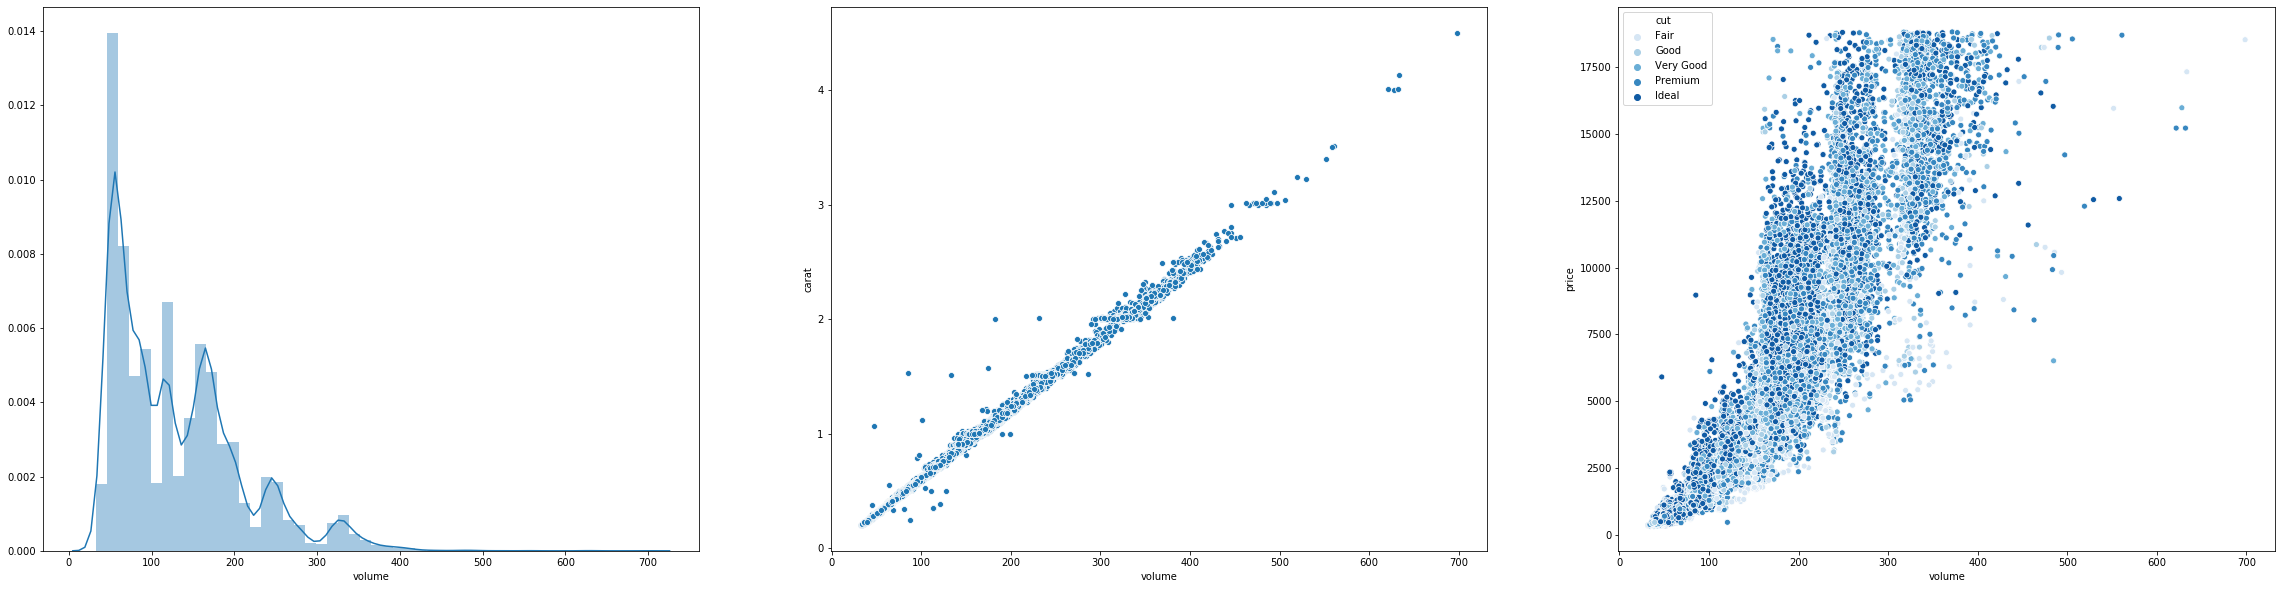

In [377]:
fig, axes = plt.subplots(ncols=3, nrows =1, figsize = (40,10))
sns.distplot(data['volume'], ax=axes[0])
sns.scatterplot(data=data, ax=axes[1], x='volume', y='carat')
sns.scatterplot(data=data, ax=axes[2], x='volume', y='price', hue='cut', hue_order=cut_order, palette='Blues');

# size anda carats are almost equal, so at this point is were cut, color and clarity change the diamond price

## Table and depth


    The Depth of a Diamond is its Height (in millimeters) measured from the Culet to the Table.
    If a Diamond's Depth Percentage is too large or small the Diamond will become Dark in appearance because it will no longer return an Attractive amount of light.


Table is the Width of the Diamond's Table expressed as a Percentage of its Average Diameter.
If the Table (Upper Flat Facet) is too Large then light will not play off of any of the Crown's angles or facets and will not create the Sparkly Rainbow Colors.
If it is too Small then the light will get Trapped and that Attention grabbing shaft of light will never come out but will “leak” from other places in the Diamond.

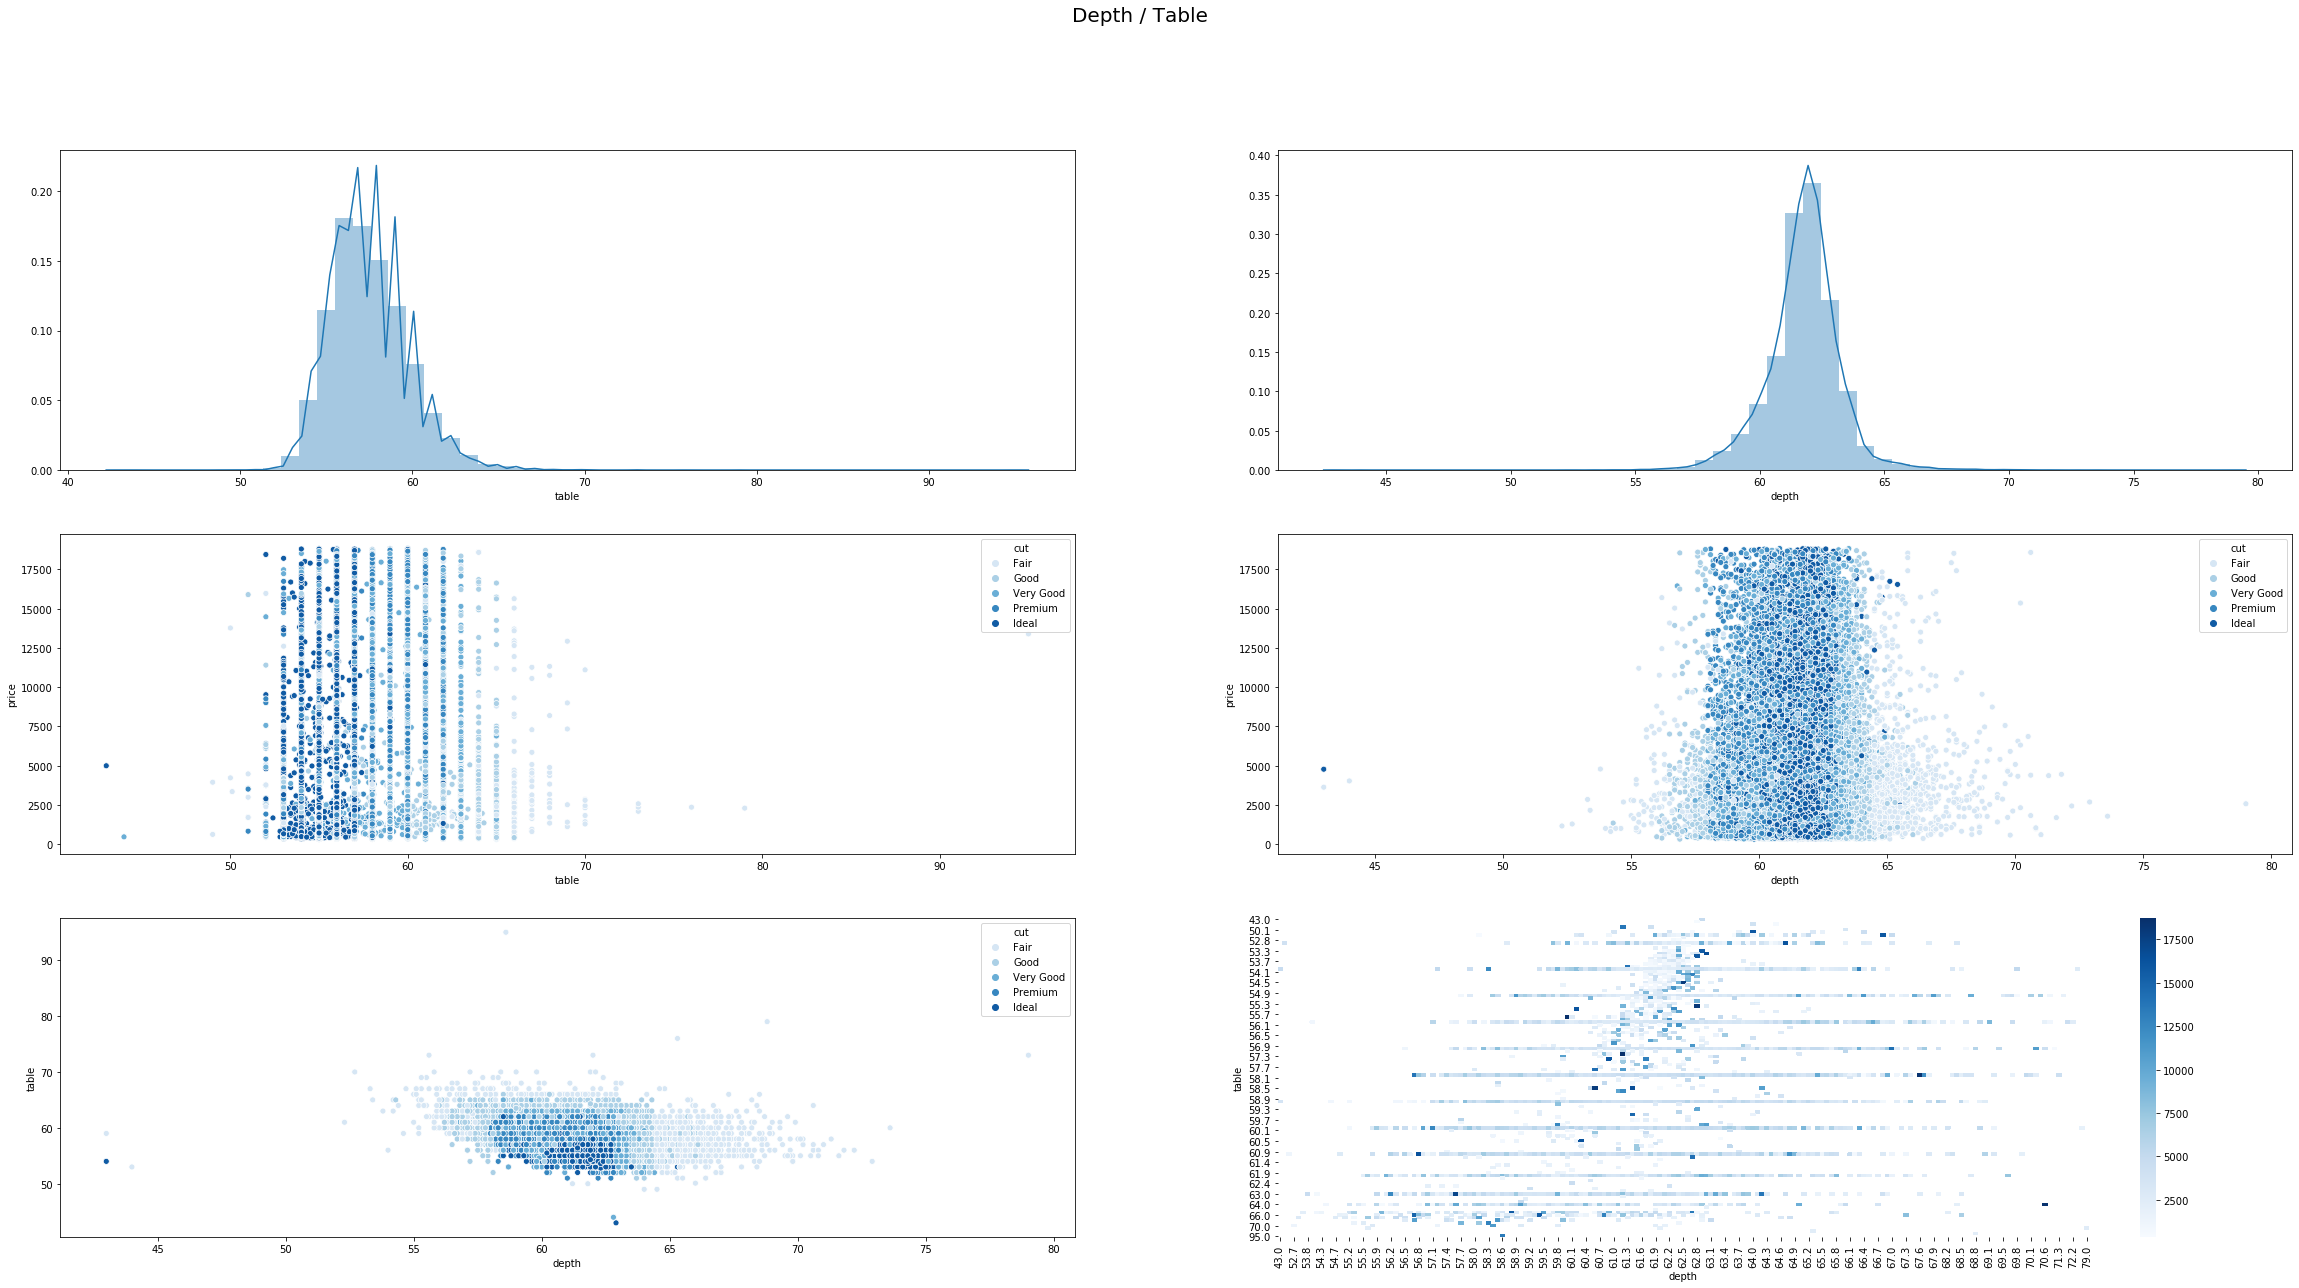

In [380]:
fig, axes = plt.subplots(ncols=2, nrows =3, figsize = (40,20))
fig.suptitle('Depth / Table', fontsize= 20)

sns.distplot(data['table'], ax=axes[0][0])
sns.distplot(data['depth'], ax=axes[0][1])

sns.scatterplot(data = data, ax=axes[1][0],x = 'table', y = 'price', hue='cut', hue_order=cut_order, palette='Blues')
sns.scatterplot(data = data, ax=axes[1][1],x = 'depth', y = 'price', hue='cut', hue_order=cut_order, palette='Blues')

sns.scatterplot(data = data, ax=axes[2][0],x = 'depth', y = 'table', hue='cut', hue_order=cut_order, palette='Blues')

table_depth = data[['table', 'depth', 'price']].pivot_table(index='table', columns='depth', aggfunc='mean')
table_depth.columns = table_depth.columns.droplevel(0)
sns.heatmap(table_depth, ax=axes[2][1], annot=False, fmt='.1f', cmap='Blues');

We can Infer from the plot that the Price can vary heavily for the same Depth

## Relationships among all variables

In [371]:
# numerical data

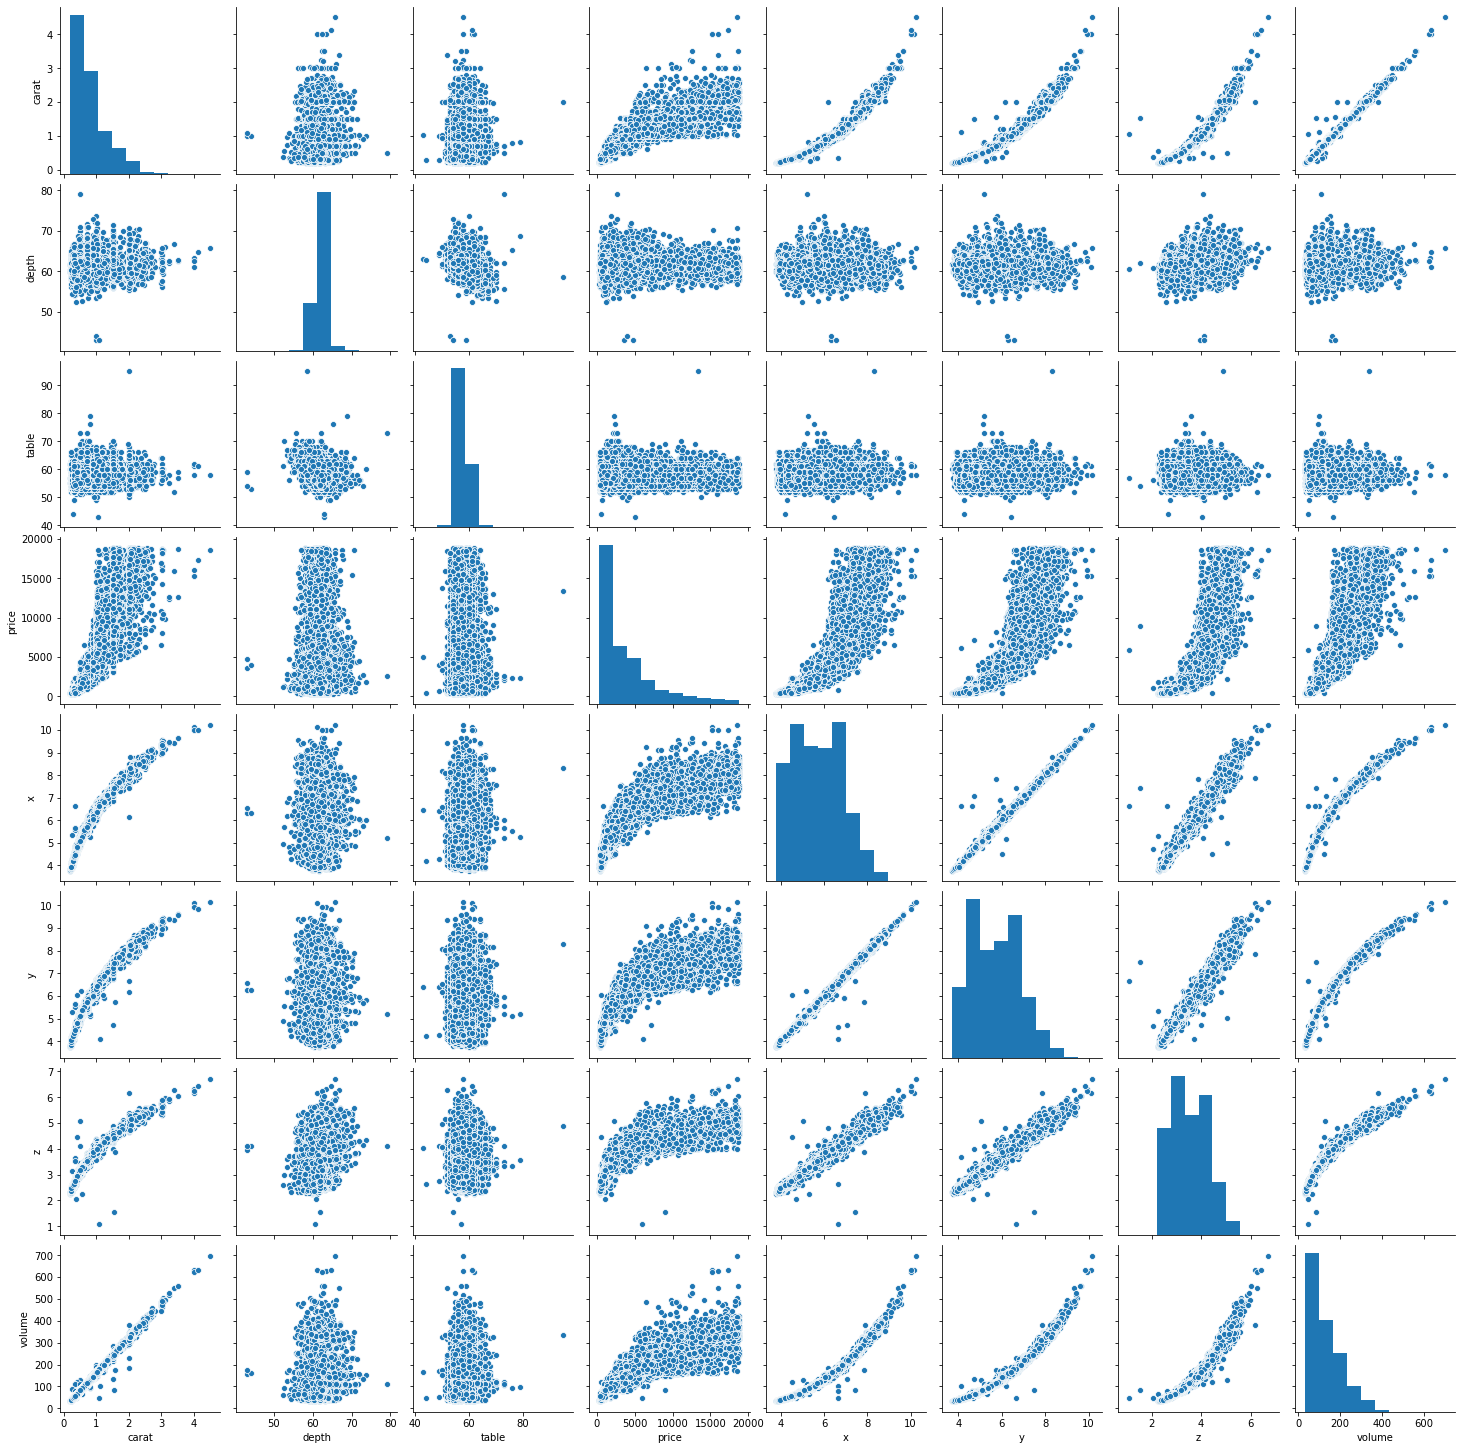

In [372]:
sns.pairplot(data);

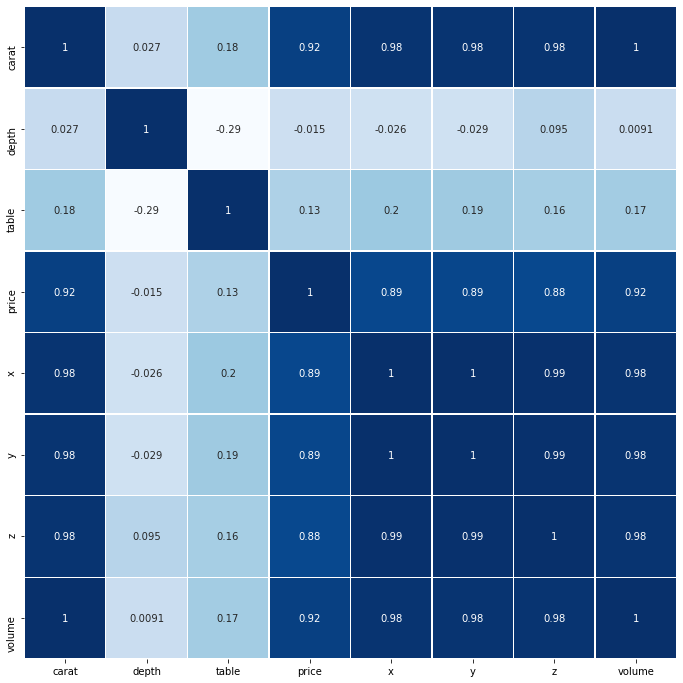

In [373]:
# Correlation matrix:

plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), annot=True,cmap='Blues',square=True,linewidths=.5, cbar=False);




# Depth is inversely related to Price.

        #This is because if a Diamond's Depth percentage is too large or small the Diamond will become 'Dark' in appearance because it will no longer return an Attractive amount of light.

# The Price of the Diamond is highly correlated to Carat, and its Dimensions.

# The Weight (Carat) of a diamond has the most significant impact on its Price.


1. Depth is inversely related to Price.

        This is because if a Diamond's Depth percentage is too large or small the Diamond will become 'Dark' in appearance because it will no longer return an Attractive amount of light.

2. The Price of the Diamond is highly correlated to Carat, and its Dimensions.

3. The Weight (Carat) of a diamond has the most significant impact on its Price.

        Since, the larger a stone is, the Rarer it is, one 2 carat diamond will be more 'Expensive' than the total cost of two 1 Carat Diamonds of the same Quality.

4. The Length(x) , Width(y) and Height(z) seems to be higly related to Price and even each other.

5. Self Relation ie. of a feature to itself is 1 as expected.